# spectra hetg acis s

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download


In [2]:
download_chandra_obsid 459 evt1,flt,asol
mv -fv 459/{primary,secondary}/*.fits.gz ./
gunzip -f *.fits.gz
rmdir 459/primary && rmdir -p 459/secondary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       97 Mb  ####################          < 1 s  108118.3 kb/s
  asol     fits       10 Mb  ####################          < 1 s  86663.8 kb/s
  flt      fits        7 Kb  ####################          < 1 s  477.3 kb/s

      Total download size for ObsId 459 = 107 Mb
      Total download time for ObsId 459 = 1 s

'459/primary/pcadf063874624N003_asol1.fits.gz' -> './pcadf063874624N003_asol1.fits.gz'
'459/secondary/acisf00459_000N003_evt1.fits.gz' -> './acisf00459_000N003_evt1.fits.gz'
'459/secondary/acisf00459_000N003_flt1.fits.gz' -> './acisf00459_000N003_flt1.fits.gz'


## tgdetect

In [3]:
pset tgdetect2 infile=acisf00459_000N003_evt1.fits
pset tgdetect2 outfile=acis_459_src1a.fits
tgdetect2 mode=h clobber=yes

[1] 53068
[1]+  Done                    ds9 acisf00459_000N003_evt1.fits -region acis_459_src1a.fits -scale log -saveimage png ds9_01.png


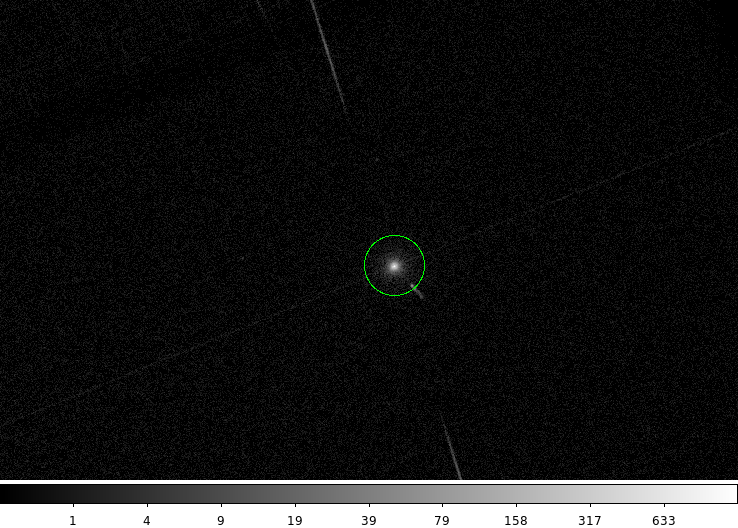

In [4]:
ds9 acisf00459_000N003_evt1.fits \
  -region acis_459_src1a.fits -scale log  \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png
  

## tg_create_mask

In [5]:
pset tg_create_mask infile=acisf00459_000N003_evt1.fits
pset tg_create_mask outfile=acis_459_evt1_L1a.fits
pset tg_create_mask input_pos_tab=acis_459_src1a.fits
tg_create_mask mode=h clob+


[1] 53126
[1]+  Done                    ds9 acisf00459_000N003_evt1.fits -bin factor 8 -scale log -region load acis_459_evt1_L1a.fits -saveimage png ds9_02.png


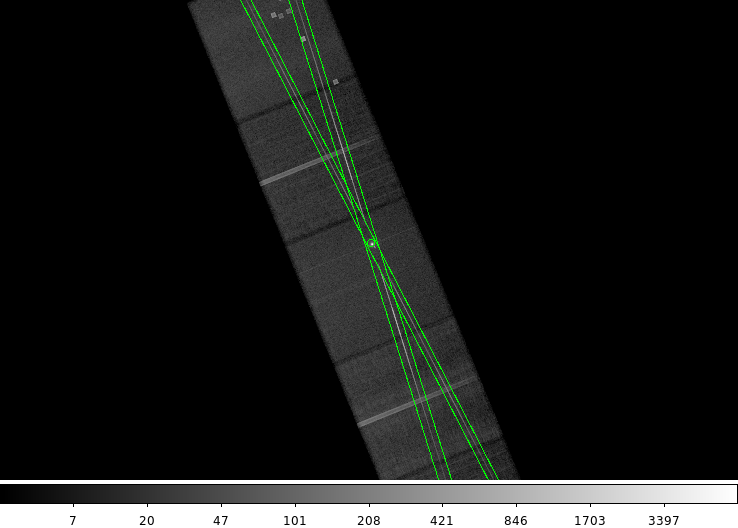

In [6]:
ds9 acisf00459_000N003_evt1.fits \
  -bin factor 8 -scale log \
  -region load acis_459_evt1_L1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

## run tg_resolve_events

In [7]:
pset tg_resolve_events infile=acisf00459_000N003_evt1.fits
pset tg_resolve_events outfile=acis_459_evt1a.fits
pset tg_resolve_events regionfile=acis_459_evt1_L1a.fits
pset tg_resolve_events acaofffile=pcadf063874624N003_asol1.fits
tg_resolve_events mode=h clob+

## Create l2

### Grade/ Status

In [8]:
dmcopy "acis_459_evt1a.fits[EVENTS][grade=0,2,3,4,6,status=0]" \
      acis_459_flt1_evt1a.fits opt=all clob+

### GTI

In [9]:
dmcopy "acis_459_flt1_evt1a.fits[EVENTS][@acisf00459_000N003_flt1.fits][cols -phas]" \
      acis_459_evt2.fits opt="" clob+

In [10]:
dmappend "acis_459_flt1_evt1a.fits[region][subspace -time]" \
      acis_459_evt2.fits

## Extract Spectrum


In [11]:
pset tgextract infile=acis_459_evt2.fits
pset tgextract outfile=acis_459_pha2.fits
tgextract mode=h clob+

In [12]:
dmlist acis_459_pha2.fits blocks

 
--------------------------------------------------------------------------------
Dataset: acis_459_pha2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table        13 cols x 12       rows
Block    3: REGION                         Table        10 cols x 36       rows


In [13]:
dmlist acis_459_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[8192]                 

# Cleanup

In [14]:
/bin/rm -f acisf* pcadf* 